# How to do a perfect Twitter sentiment analysis using Twitter API

Inspiration: https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795

The objective here is to analyse the tweets using Twitter API.

The goal is to identify individual tweets as positive, negative and neutral and to calculate the percentage of positive and negative tweets. The goal is to analyse tweets of a politician Alex Stubb and calculate the percentage of positive and negative tweets.

The difference between polarity and subjective is that polarity is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. The polarity indicates sentiment with a value from -1.0 (negative) to 1.0 (positive) with 0.0 being neutral. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. The subjectivity is a value from 0.0 (objective) to 1.0 (subjective).

## Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         
plt.style.use('fivethirtyeight')

## Creating Twitter API

In [2]:
# Creating Twitter API: consumerkey, consumersecret, accesstoken, accesstokensecret

consumerkey='secret'
consumersecret='secret'
accesstoken='secret'
accesstokensecret='secret'

## Authenticate Twitter API

In [3]:
import tweepy
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
#set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)
#create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

## Accessing tweets
### We are extracting recent 200 tweets of Alex Stubb for analysis.

In [4]:
# The most recent 200 tweets

post=api.user_timeline(screen_name='alexstubb',count=200, tweet_mode='extended')

## Printing 15 recent tweets

In [5]:
# printing 15 recent tweets

print('showing 15 recent tweets: \n')
i=1
for tweet in post[:15]:    
    
        print(str(i)+')'+tweet.full_text + '\n' )
        i+=1

showing 15 recent tweets: 

1)Two packed days with @cmioffice board in London. Intellectually rewarding. Socially engaging. Practical and useful. Good preparation by team. Easy to work with stellar board members. Proud to Chair the board. Now back to Florence.

2)RT @MKeinanen: Bumped into Council Deputy Director-General David Galloway who weared a tie from the first Finnish EU Presidency 1999!! ⁦@al…

3)RT @alexstubb: If there where a pendulum between state and market in Europe, it was solidly in the market corner from the mid-1980s to abou…

4)RT @alemannoEU: 🦠The EU wakes up in another patchwork of #COVID19 restrictions, which tacitly grew over time along jurisdictional - not epi…

5)Move toward state began partially with 9/11, but more with the financial crisis around 2010. Accelerated by asylum and pandemic crisis. Now more about financial market regulation, industrial policy, state control, borders and control. Swing back at some stage. Normal. 2/2

6)If there where a pendulum be

## Extracting english tweets only

In [6]:
# extracting english tweets only

print('showing recent english tweets: \n')
i=1
for tweet in post:
    if i<=15:    
        if tweet.lang=='en':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent english tweets: 

1 ) Two packed days with @cmioffice board in London. Intellectually rewarding. Socially engaging. Practical and useful. Good preparation by team. Easy to work with stellar board members. Proud to Chair the board. Now back to Florence.

2 ) RT @MKeinanen: Bumped into Council Deputy Director-General David Galloway who weared a tie from the first Finnish EU Presidency 1999!! ⁦@al…

3 ) RT @alexstubb: If there where a pendulum between state and market in Europe, it was solidly in the market corner from the mid-1980s to abou…

4 ) RT @alemannoEU: 🦠The EU wakes up in another patchwork of #COVID19 restrictions, which tacitly grew over time along jurisdictional - not epi…

5 ) Move toward state began partially with 9/11, but more with the financial crisis around 2010. Accelerated by asylum and pandemic crisis. Now more about financial market regulation, industrial policy, state control, borders and control. Swing back at some stage. Normal. 2/2

6 ) If there wh

## Extracting finnish tweets only

In [7]:
# extracting finnish tweets only

print('showing recent finnish tweets: \n')
i=1
for tweet in post:
    if i<=15:    
        if tweet.lang=='fi':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent finnish tweets: 

1 ) RT @saation: Jyrki on poissa. Hän nukkui pois eilen illalla klo 23.15. Yhdistyksemme työ kuitenkin jatkuu ja keskittyy Jyrki Kasvin nimeä k…

2 ) RT @MikkoSpolander: Vielä ehtii. Tämä viikko aikaa hakea huippuhommiin erityisasiantuntijaksi @VMuutiset kansantalousosastolle julkisen tal…

3 ) RT @JariTaponen: Nuorten väkivaltarikostrendi on vuosia ollut laskeva etenkin Helsingissä. Jonkin verran on ollut keskustelua siitä, että r…

4 ) RT @rehnsilva: @alexstubb @hsfi Tulkitsin jutut niin, että annetaan tilaa ja arvoa niillekin isille, joiden on joskus vaikea olla isä. Näis…

5 ) RT @JohannaOrpana: @alexstubb @Lin_Manuel Lin Manuel Miranda on nero 💕
Ja My Shot yksi parhaista biiseistä 🎶💯

6 ) RT @5by5nina: Alex on asian ytimessä.

7 ) RT @alexstubb: Olen menossa lauantaina tyttäreni kanssa katsomaan Hamilton-musikaalia. Olimme ajatelleet käydä ennen sitä kimpassa pienellä…

8 ) RT @susuleino: @alexstubb Hamilton on upeista upein

9 ) Olen menossa lauan

## Getting tweets with keyword, hashtags or trending items also insted of some user name. 
### Now searching top trending tweets for “Bitcoin”.

In [8]:
# searching top trending tweets for bitcoin

cursor=tweepy.Cursor(api.search_tweets,
       q='bitcoin',tweet_mode='extended').items(15)
for i in cursor:   
    print(i.full_text)

RT @BTC_Archive: 💥Estonia's largest bank will allow customer to buy #Bitcoin directly through their accounts next weel.
RT @AirdropStario: 💧 InPoker Airdrop 💧

🏆 Task:          ➕ Up to 200 INP (~$4)

👨‍👩‍👧 Referral:   ➕ 100,000 INP (~$2000) for the top 100 re…
RT @RoflGandhi_: jitna niche Bitcoin gir raha hai, uss se toh lagta hai ki sarkar iska bhi naam badalkar SamBitcoin kar degi 😭 #cryptocurre…
#仮想通貨 #BAAS
Bittrex高騰/暴落 速報(5分前価格と???較)
[BTC-BAAS]-60.00%0.000000020
[BTC-EDR]-25.00%0.000000030
[USDT-OGT]23.71%0.600000000
[BTC-BMP]15.38%0.000000150
[USD-BEAR]-11.11%0.000080000

【10%???上】の変動!アービトラージチャンス!
#拡散希望
@MasonVersluis #bitcoin has resistance at 57.2k at the moment, Has 56.8k as support.Needs to see another close above 61.7k to see her test 65k

@3x_btc is a super underrated bitcoiner I’ve been taking her tweets and tips seriously &amp; I’ve  been doing really great

Follow her
RT @Vforrkripto: Silkemeler Alım Fırsatı olacak. Şubat sonuna kadar Mega Ralli Kademe Kademe Devam edecek

## Creating dataframe
### Converting all 200 tweets into dataframe, so that we can clean and analyse given tweets

In [9]:
# converting tweets into dataframe

df=pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=='en'], columns=['Tweets'])
df.head(10)

,Tweets
0,Two packed days with @cmioffice board in Londo...
1,RT @MKeinanen: Bumped into Council Deputy Dire...
2,RT @alexstubb: If there where a pendulum betwe...
3,RT @alemannoEU: 🦠The EU wakes up in another pa...
4,"Move toward state began partially with 9/11, b..."
5,If there where a pendulum between state and ma...
6,.@kristianblu just broke the Ironman world rec...
7,RT @JMGlachant: 240 years of Alex dynasties…. ...
8,Proud of my @ucl student. https://t.co/JMSWiSh5qE
9,RT @MaduroPoiares: @alexstubb @HamiltonMusical...


## Creating function to clean and remove unwanted text or symbol like RT,@,# and links.

In [10]:
# creating function go clean tweets

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
    text=re.sub(r'🦠+','',text)  ## removing sign
    text=re.sub(r':+','',text)  ## removing sign
    text=re.sub(r'"+','',text)  ## removing sign
    text=re.sub(r',+','',text)  ## removing sign
    
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df.head(10)

,Tweets
0,Two packed days with board in London. Intelle...
1,Bumped into Council Deputy Director-General D...
2,If there where a pendulum between state and m...
3,The EU wakes up in another patchwork of COVID...
4,Move toward state began partially with 9/11 bu...
5,If there where a pendulum between state and ma...
6,. just broke the Ironman world record in his f...
7,240 years of Alex dynasties…. \n\nIf you add ...
8,Proud of my student. https//t.co/JMSWiSh5qE
9,You’re going to love it!


## Getting subjectivity and polarity

Using cleaned tweets

In [11]:
# Getting subjectivity and polarity using cleaned tweets

from textblob import TextBlob

## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
## show new Dataframe
df.head(15)

,Tweets,Subjectivity,Polarity
0,Two packed days with board in London. Intelle...,0.547917,0.422917
1,Bumped into Council Deputy Director-General D...,0.333333,0.390625
2,If there where a pendulum between state and m...,0.100000,0.000000
3,The EU wakes up in another patchwork of COVID...,0.000000,0.000000
4,Move toward state began partially with 9/11 bu...,0.278571,0.150000
5,If there where a pendulum between state and ma...,0.371429,0.109524
6,. just broke the Ironman world record in his f...,0.333333,0.390625
7,240 years of Alex dynasties…. \n\nIf you add ...,0.625000,0.650000
8,Proud of my student. https//t.co/JMSWiSh5qE,1.000000,0.800000
9,You’re going to love it!,0.600000,0.625000


In [12]:
## Creating function to compute positive, negative and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(15)

,Tweets,Subjectivity,Polarity,Analysis
0,Two packed days with board in London. Intelle...,0.547917,0.422917,Positive
1,Bumped into Council Deputy Director-General D...,0.333333,0.390625,Positive
2,If there where a pendulum between state and m...,0.100000,0.000000,Neutral
3,The EU wakes up in another patchwork of COVID...,0.000000,0.000000,Neutral
4,Move toward state began partially with 9/11 bu...,0.278571,0.150000,Positive
5,If there where a pendulum between state and ma...,0.371429,0.109524,Positive
6,. just broke the Ironman world record in his f...,0.333333,0.390625,Positive
7,240 years of Alex dynasties…. \n\nIf you add ...,0.625000,0.650000,Positive
8,Proud of my student. https//t.co/JMSWiSh5qE,1.000000,0.800000,Positive
9,You’re going to love it!,0.600000,0.625000,Positive


### Getting negative tweets from dataframe

In [13]:
## negative Tweets in dataframe

df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
11,”Opinion whether well or ill founded is the go...,0.550000,-0.250000,Negative
28,One of the biggest threats to liberal democrac...,0.230556,-0.100000,Negative
36,Hitting town with the youngsters. Florence ni...,0.666667,-0.333333,Negative
38,Hitting town with the youngsters. Florence nig...,0.666667,-0.333333,Negative
42,🚨🚨🇪🇺🇬🇧👩‍🏫🧑‍🏫🇫🇷🇩🇪⛔️⛔️⛔️⛔️🇪🇺🇬🇧🚨\n\nOne of the m...,0.466667,-0.100000,Negative
61,Need some help. Registered to here in Italy. ...,0.900000,-0.500000,Negative
71,With all due respect it is easy for us to be ...,0.641667,-0.038333,Negative
72,With all due respect it is easy for us to be g...,0.720238,-0.129762,Negative
96,We live in a polarised world. Pertains to dis...,0.500000,-0.025568,Negative
97,We live in a polarised world. Pertains to disc...,0.542857,-0.164448,Negative


### Getting positive  tweets from dataframe

In [14]:
## positive tweets in Dataframe

df[df.Analysis=='Positive']   ## Another way of indexing

,Tweets,Subjectivity,Polarity,Analysis
0,Two packed days with board in London. Intelle...,0.547917,0.422917,Positive
1,Bumped into Council Deputy Director-General D...,0.333333,0.390625,Positive
4,Move toward state began partially with 9/11 bu...,0.278571,0.150000,Positive
5,If there where a pendulum between state and ma...,0.371429,0.109524,Positive
6,. just broke the Ironman world record in his f...,0.333333,0.390625,Positive
...,...,...,...,...
154,I am married to an Innes.,0.250000,0.250000,Positive
155,With these guys we tran hard and play hard. Pr...,0.680556,0.269444,Positive
156,Excellent meeting at the headquarters with ...,1.000000,1.000000,Positive
157,Not quite sure if this is the right framing ...,0.608201,0.261905,Positive


### Printing all positive tweets

In [15]:
## printing all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Two packed days with  board in London. Intellectually rewarding. Socially engaging. Practical and useful. Good preparation by team. Easy to work with stellar board members. Proud to Chair the board. Now back to Florence.

2) Bumped into Council Deputy Director-General David Galloway who weared a tie from the first Finnish EU Presidency 1999!! ⁦…

3)Move toward state began partially with 9/11 but more with the financial crisis around 2010. Accelerated by asylum and pandemic crisis. Now more about financial market regulation industrial policy state control borders and control. Swing back at some stage. Normal. 2/2

4)If there where a pendulum between state and market in Europe it was solidly in the market corner from the mid-1980s to about 2010. All about single market market reform liberalisation free trade and competition. 1/2

5). just broke the Ironman world record in his first Ironman. Fantastiskt! Grattis!  https//t.co/7RXOAA0jpL

6) 240 years of Alex dynasties…. 

If you add 215

### Printing all negative tweets

In [16]:
## printing all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)”Opinion whether well or ill founded is the governing principle of human affairs”. Alexander Hamilton 1778.

2)One of the biggest threats to liberal democracy is the energence of a public discourse based on virtual or alternative facts and truths. Without a common understanding of basic realities extremes will dominate. When that happens democracy begins to wither away.

3) Hitting town with the youngsters. Florence nighlife. Serious clubbing. https//t.co/PIlvy2YyYh

4)Hitting town with the youngsters. Florence nighlife. Serious clubbing. https//t.co/PIlvy2YyYh

5) 🚨🚨🇪🇺🇬🇧👩‍🏫🧑‍🏫🇫🇷🇩🇪⛔️⛔️⛔️⛔️🇪🇺🇬🇧🚨

One of the most infuriating brexit stories I’ve written. And I’ve done a few

Post-Brexit i…

6)Need some help. Registered to  here in Italy. Wanted to see Dopesick because I read Patrick Radden Keefe’s ”Empire of Pain”. Watched two episodes out of the eight that have been released but I can’t find the remaining six anywhere. What am I doing wrong?

7) With all due respect it is easy for us t

### Plotting word cloud

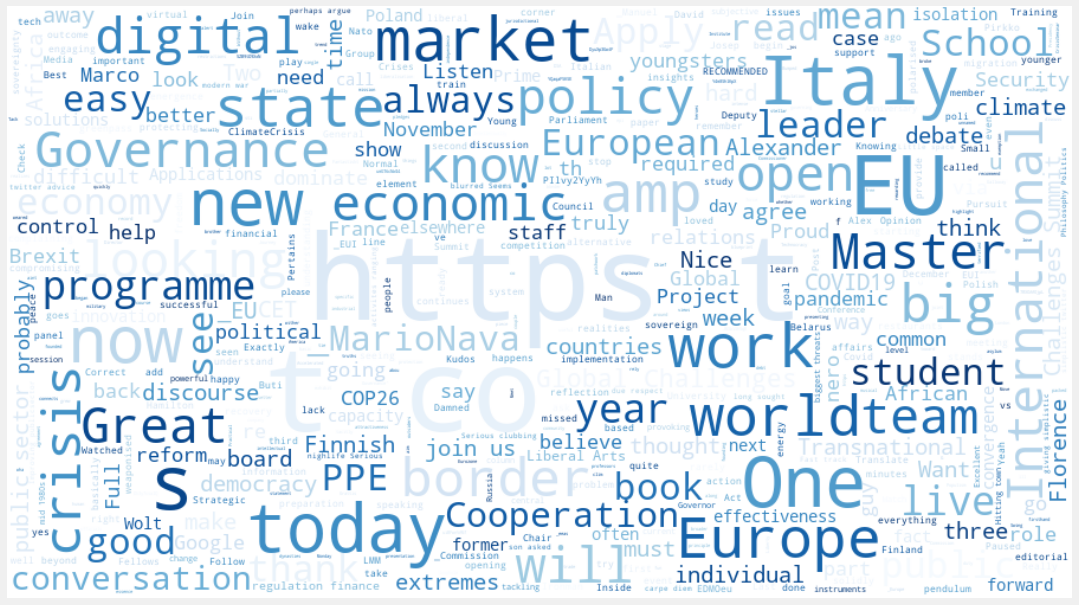

In [17]:
# plotting word cloud

from wordcloud import WordCloud

## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
#wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
#plt.imshow(wordCloud,interpolation='bilinear' )
#plt.axis('off')
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      background_color='white',
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(allWords)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Plotting scatter graph between polarity and subjectivity.

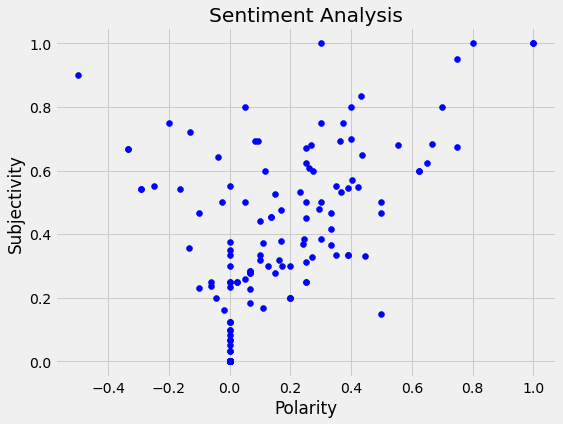

In [18]:
## plotting polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Red dots represent negative tweets, green dots represent positive tweets and remaining blue dots are neutral tweets.

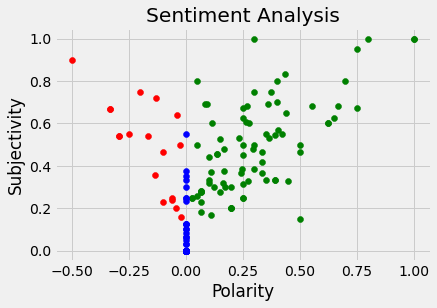

In [19]:
# visualising the sentiment analysis with dots

for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Getting percentage of positive and negative tweets and plotting bar graph.

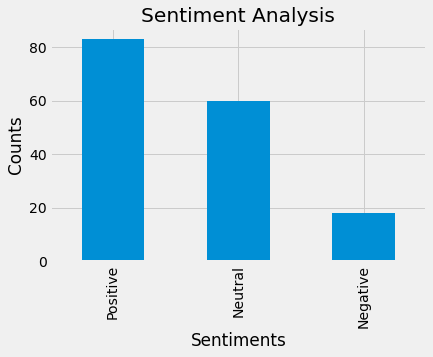

In [20]:
# getting percentage of positive and negative tweets and plotting bar graph

ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

As you can see, from the above bar graph we can conclude that this person has tweeted more positive tweets than negative tweets.